In [1]:
import pandas as pd
import numpy as np
import sqlite3
import json
import matplotlib.pyplot as plt

In [2]:
cnx = sqlite3.connect('output/results.db')
df = pd.read_sql_query("SELECT * FROM x_result", cnx)
dfT1 = df.query('input_form == "t1" or input_form == "t1c-features" or input_form == "t1c"')
dfT2 = df.query('input_form == "t2" or input_form == "t2-features"')

In [3]:
#list of input forms (exact strings):
#t1c features
#t1c
#t1

#t2
#t2-features

#t1c-t2

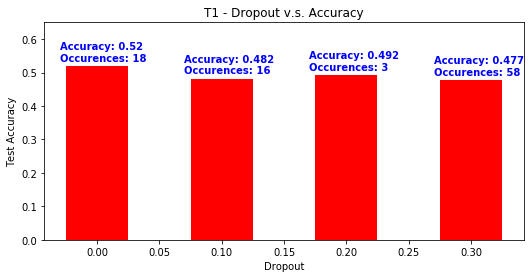

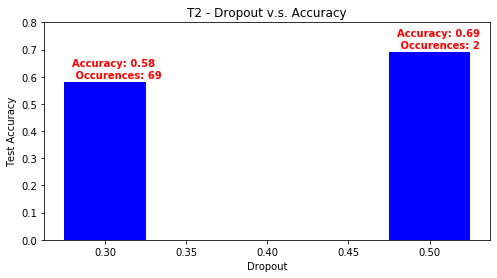

In [4]:
#generate dropout graph
d1 = {} #dict from dropout to (correct, total) for T1
t1count = {}
d2 = {} #dict from dropout to (correct, total) for T2
t2count = {}

for idx, row in dfT1.iterrows():
    hypJson = json.loads(row['hyperparameters'])
    if hypJson['dropout'] not in d1:
        d1[hypJson['dropout']] = (row['test_accuracy'] * len(row['test_labels']), len(row['test_labels']))
        t1count[hypJson['dropout']] = 1
    else:
        d1[hypJson['dropout']] = (d1[hypJson['dropout']][0] + row['test_accuracy'] * len(row['test_labels']), #correct
                             d1[hypJson['dropout']][1] + len(row['test_labels'])) #total
        t1count[hypJson['dropout']] = t1count[hypJson['dropout']] + 1

for idx, row in dfT2.iterrows():
    hypJson = json.loads(row['hyperparameters'])
    if hypJson['dropout'] not in d2:
        d2[hypJson['dropout']] = (row['test_accuracy'] * len(row['test_labels']), len(row['test_labels']))
        t2count[hypJson['dropout']] = 1
    else:
        d2[hypJson['dropout']] = (d2[hypJson['dropout']][0] + row['test_accuracy'] * len(row['test_labels']), #correct
                             d2[hypJson['dropout']][1] + len(row['test_labels'])) #total
        t2count[hypJson['dropout']] = t2count[hypJson['dropout']] + 1 
for el1 in d1.keys():
    d1[el1] = d1[el1][0]/d1[el1][1]
for el2 in d2.keys():
    d2[el2] = d2[el2][0]/d2[el2][1]

fig, ax = plt.subplots()
fig.set_size_inches((8.6, 4))
width = 0.05 # the width of the bars 
ind = list(d1.keys()) # the x locations for the groups
ax.bar(d1.keys(), d1.values(), width, color="red")
plt.ylim((0, .65))
plt.title('T1 - Dropout v.s. Accuracy')
plt.xlabel('Dropout')
plt.ylabel('Test Accuracy') 
for i, v in zip(ind, d1.values()):
    ax.text(i-.03, v+.015, "Accuracy: {}\nOccurences: {}".format(str(round(v, 3)), t1count[i]), color='blue', fontweight='bold')
    
fig, ax = plt.subplots()   
fig.set_size_inches((8, 4))
width = 0.05 # the width of the bars 
ind = list(d2.keys()) # the x locations for the groups
ax.bar(d2.keys(), d2.values(), width, color='blue')
plt.ylim((0, .80))
plt.title('T2 - Dropout v.s. Accuracy')
plt.xlabel('Dropout')
plt.ylabel('Test Accuracy') 
for i, v in zip(ind, d2.values()):
    ax.text(i-.02, v+.015, "Accuracy: {}\n Occurences: {}".format(str(round(v, 3)), t2count[i]), color='red', fontweight='bold')

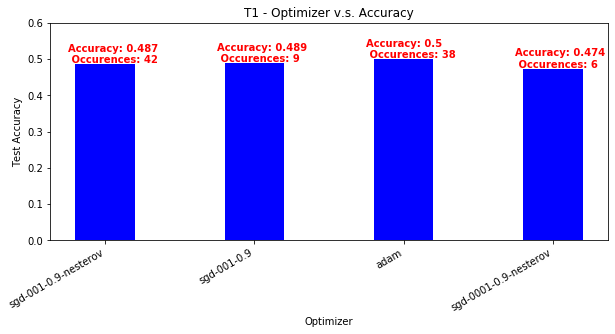

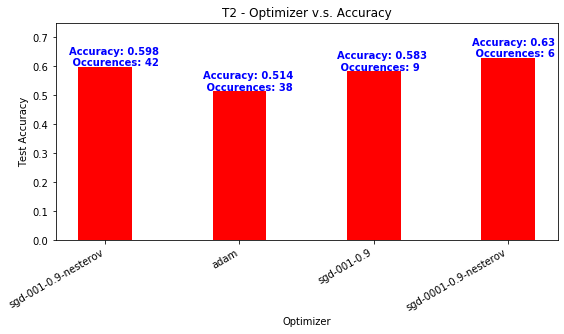

In [5]:
#generate optimizer graph
d1 = {} #dict from dropout to (correct, total) for T1
t1counts = {}
d2 = {} #dict from dropout to (correct, total) for T2
t2counts = {}
for idx, row in dfT1.iterrows():
    hypJson = json.loads(row['hyperparameters'])
    if hypJson['optimizer'] not in d1:
        d1[hypJson['optimizer']] = (row['test_accuracy'] * len(row['test_labels']), len(row['test_labels']))
        t1counts[hypJson['optimizer']] = 1
    else:
        d1[hypJson['optimizer']] = (d1[hypJson['optimizer']][0] + row['test_accuracy'] * len(row['test_labels']), #correct
                             d1[hypJson['optimizer']][1] + len(row['test_labels'])) #total
        t1counts[hypJson['optimizer']] = t1counts[hypJson['optimizer']] + 1

for idx, row in dfT2.iterrows():
    hypJson = json.loads(row['hyperparameters'])
    if hypJson['optimizer'] not in d2:
        d2[hypJson['optimizer']] = (row['test_accuracy'] * len(row['test_labels']), len(row['test_labels']))
        t2counts[hypJson['optimizer']] = 1
    else:
        d2[hypJson['optimizer']] = (d2[hypJson['optimizer']][0] + row['test_accuracy'] * len(row['test_labels']), #correct
                             d2[hypJson['optimizer']][1] + len(row['test_labels'])) #total
        t2counts[hypJson['optimizer']] = t2counts[hypJson['optimizer']] + 1 

for el1 in d1.keys():
    d1[el1] = d1[el1][0]/d1[el1][1]
for el2 in d2.keys():
    d2[el2] = d2[el2][0]/d2[el2][1]

fig, ax = plt.subplots()    
width = 0.4 # the width of the bars 
ax.bar(d1.keys(), d1.values(), width, color="blue")
fig.set_size_inches((10, 4))
plt.title('T1 - Optimizer v.s. Accuracy')
plt.xlabel('Optimizer')
plt.ylim((0, .60))
plt.ylabel('Test Accuracy') 
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

for i, v in enumerate(d1.values()):
    ax.text(i-.25, v+.003, "Accuracy: {}\n Occurences: {}".format(str(round(v, 3)), t1counts[list(d1.keys())[i]]), color='red', fontweight='bold')
    
fig, ax = plt.subplots()    
width = 0.4 # the width of the bars 
ax.bar(d2.keys(), d2.values(), width, color="red")
fig.set_size_inches((9, 4))
plt.ylim((0, .75))
plt.title('T2 - Optimizer v.s. Accuracy')
plt.xlabel('Optimizer')
plt.ylabel('Test Accuracy') 
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
for i, v in enumerate(d2.values()):
    ax.text(i-.27, v+.003, "Accuracy: {}\n Occurences: {}".format(str(round(v, 3)), t1counts[list(d2.keys())[i]]), color='blue', fontweight='bold')

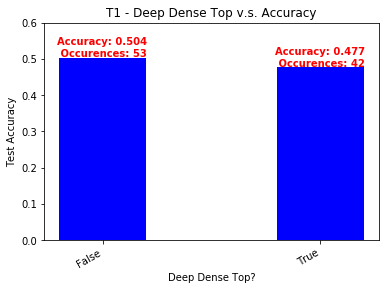

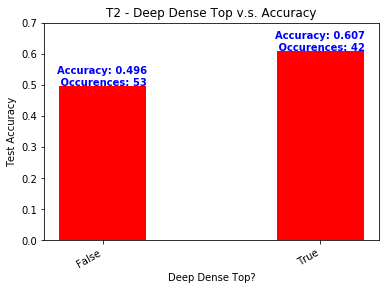

In [6]:
#generate deep-dense-top graph
d1 = {} #dict from dropout to (correct, total) for T1
t1counts = {}
d2 = {} #dict from dropout to (correct, total) for T2
t2counts = {}
for idx, row in dfT1.iterrows():
    hypJson = json.loads(row['hyperparameters'])
    if hypJson['deep-dense-top'] not in d1:
        d1[hypJson['deep-dense-top']] = (row['test_accuracy'] * len(row['test_labels']), len(row['test_labels']))
        t1counts[hypJson['deep-dense-top']] = 1
    else:
        d1[hypJson['deep-dense-top']] = (d1[hypJson['deep-dense-top']][0] + row['test_accuracy'] * len(row['test_labels']), #correct
                             d1[hypJson['deep-dense-top']][1] + len(row['test_labels'])) #total
        t1counts[hypJson['deep-dense-top']] = t1counts[hypJson['deep-dense-top']] + 1

for idx, row in dfT2.iterrows():
    hypJson = json.loads(row['hyperparameters'])
    if hypJson['deep-dense-top'] not in d2:
        d2[hypJson['deep-dense-top']] = (row['test_accuracy'] * len(row['test_labels']), len(row['test_labels']))
        t2counts[hypJson['deep-dense-top']] = 1
    else:
        d2[hypJson['deep-dense-top']] = (d2[hypJson['deep-dense-top']][0] + row['test_accuracy'] * len(row['test_labels']), #correct
                             d2[hypJson['deep-dense-top']][1] + len(row['test_labels'])) #total
        t2counts[hypJson['deep-dense-top']] = t2counts[hypJson['deep-dense-top']] + 1 
for el in d1.keys():
    d1[el] = d1[el][0]/d1[el][1]
for el in d2.keys():
    d2[el] = d2[el][0]/d2[el][1]
fig, ax = plt.subplots()    
width = 0.4 # the width of the bars 
ax.bar(['False', 'True'], d1.values(), width, color="blue")
plt.title('T1 - Deep Dense Top v.s. Accuracy')
plt.xlabel('Deep Dense Top?')
plt.ylabel('Test Accuracy') 
plt.ylim((0, .6))
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
for i, v in enumerate(d1.values()):
    ax.text(i-.21, v+.003, "Accuracy: {}\n Occurences: {}".format(str(round(v, 3)), t1counts[i]), color='red', fontweight='bold')
    
fig, ax = plt.subplots()    
width = 0.4 # the width of the bars 
ax.bar(['False', 'True'], d2.values(), width, color="red")
plt.ylim((0, .7))
plt.title('T2 - Deep Dense Top v.s. Accuracy')
plt.xlabel('Deep Dense Top?')
plt.ylabel('Test Accuracy') 
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
for i, v in enumerate(d2.values()):
    ax.text(i-.21, v+.003, "Accuracy: {}\n Occurences: {}".format(str(round(v, 3)), t1counts[i]), color='blue', fontweight='bold')

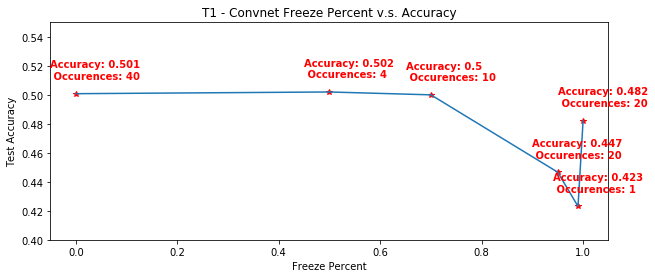

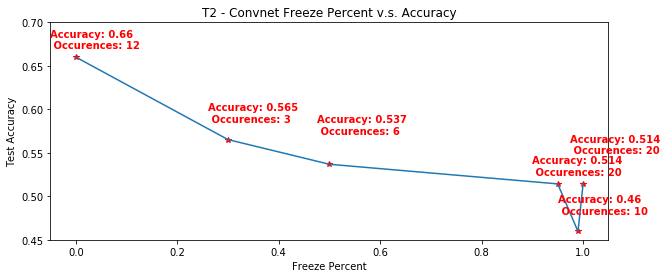

In [7]:
#generate convnet-freeze-percent graph
d1 = {} #dict from dropout to (correct, total) for T1
t1counts = {}
d2 = {} #dict from dropout to (correct, total) for T2
t2counts = {}
for idx, row in dfT1.iterrows():
    hypJson = json.loads(row['hyperparameters'])
    if hypJson['convnet-freeze-percent'] not in d1:
        d1[hypJson['convnet-freeze-percent']] = (row['test_accuracy'] * len(row['test_labels']), len(row['test_labels']))
        t1counts[hypJson['convnet-freeze-percent']] = 1
    else:
        d1[hypJson['convnet-freeze-percent']] = (d1[hypJson['convnet-freeze-percent']][0] + row['test_accuracy'] * len(row['test_labels']), #correct
                             d1[hypJson['convnet-freeze-percent']][1] + len(row['test_labels'])) #total
        t1counts[hypJson['convnet-freeze-percent']] = t1counts[hypJson['convnet-freeze-percent']] + 1

for idx, row in dfT2.iterrows():
    hypJson = json.loads(row['hyperparameters'])
    if hypJson['convnet-freeze-percent'] not in d2:
        d2[hypJson['convnet-freeze-percent']] = (row['test_accuracy'] * len(row['test_labels']), len(row['test_labels']))
        t2counts[hypJson['convnet-freeze-percent']] = 1
    else:
        d2[hypJson['convnet-freeze-percent']] = (d2[hypJson['convnet-freeze-percent']][0] + row['test_accuracy'] * len(row['test_labels']), #correct
                             d2[hypJson['convnet-freeze-percent']][1] + len(row['test_labels'])) #total
        t2counts[hypJson['convnet-freeze-percent']] = t2counts[hypJson['convnet-freeze-percent']] + 1
for el in d1.keys():
    d1[el] = d1[el][0]/d1[el][1]
for el in d2.keys():
    d2[el] = d2[el][0]/d2[el][1]

fig, ax = plt.subplots()    
width = 0.1 # the width of the bars 
ind = sorted(d1.keys()) # the x locations for the groups
plt.plot(ind, [d1[a] for a in ind], 'r*')
plt.plot(ind, [d1[a] for a in ind])
plt.title('T1 - Convnet Freeze Percent v.s. Accuracy')
plt.xlabel('Freeze Percent')
plt.ylim((.4, .55))
plt.ylabel('Test Accuracy')
fig.set_size_inches((10, 4))
for i in ind:
    ax.text(i-.05, d1[i] + .01, "Accuracy: {}\n Occurences: {}".format(str(round(d1[i], 3)), t1counts[i]), color='red', fontweight='bold')

ind = sorted(d2.keys()) # the x locations for the groups
fig, ax = plt.subplots()    
width = 0.1 # the width of the bars 
ind = sorted(d2.keys()) # the x locations for the groups
plt.plot(ind, [d2[a] for a in ind], 'r*')
plt.plot(ind, [d2[a] for a in ind])
plt.title('T2 - Convnet Freeze Percent v.s. Accuracy')
plt.xlabel('Freeze Percent')
plt.ylim((0, 1))
plt.ylim((.45, .70))
plt.ylabel('Test Accuracy')
fig.set_size_inches((10, 4))
a = .025
for i in ind:
    if a == .025:
        a = 0
    elif a == .01:
        a = .025
    else:
        a = .01
    ax.text(i-.05+a, d2[i] + .01 + a, "Accuracy: {}\n Occurences: {}".format(str(round(d2[i], 3)), t2counts[i]), color='red', fontweight='bold')